# CS5228 Assignment 4 - Recommender Systems & Graph Mining

Hello everyone, this assignment notebook covers Recommender Systems & Graph Mining. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:**
* Rename and save this Jupyter notebook as **cs5228_a4_YourName_YourNUSNETID.ipynb** (e.g., **cs5228_a4_BobSmith_e12345678.ipynb**) before submission!
* Rename and save the script file *cs5228_a4.py* as **cs5228_a4_YourName_YourNUSNETID.py** (e.g., **cs5228_a4_BobSmith_e12345678.py**) before submission!
* Submission deadline is Nov XX, 11.59 pm. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use your full name if it's rather long; it's just  important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [1]:
student_id = 'E1268038'
nusnet_id = 'A0286970M'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well, but you can use the overview below to double-check that you covered everything.

* **1 Recommender Systems (30 Points)**
    * 1.1 Content-based (User-Item Similarities) (7 Points)
        * 1.1 a) Calculate User Profile (5 Points)
        * 1.1 b) Calculate User-Item Similarities (2 Points)
    * 1.2 User-based Collaborative Filtering (7 Points)
        * 1.2 a) Calculate User-User Similarities (5 Points)
        * 1.2 b) Calculate Estimated Rating (2 Points)
    * 1.3 Matrix Factorization (16 Points)
        * 1.3 a) Implement Non-Negative Matrix Factorization (8 Points)
        * 1.3 b) Hyperparameter Exploration (3 Points)
        * 1.3 c) Matrix Factorization & Updates (5 Points)
* **2 Graph Mining (20 Points)**
    * 2.1 Implementing Closeness Centrality (4 Points)
    * 2.2 Implementing PageRank Centrality (8 Points)
    * 2.3 Comparing Centrality Measures (8 Points)
        * 2.3 a) Run Off-The-Shelf Centrality Algorithms (3 Points)
        * 2.3 b) Discussion of Results (5 Points)

## Setting up the Notebook

### Enable Auto-Reload

This ensures that any saved changes to your `.py` file gets automatically reloaded.

In [2]:
%load_ext autoreload
%autoreload 2

### Enable "Inline Plotting"

In [3]:
%matplotlib inline

### Importing Required Packages

In [4]:
import numpy as np
import pandas as pd
import networkx as nx

from src.utils import plot_mrt_graph

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `cs5228_a4.py`, you also need to edit the import statement below accordingly.

In [5]:
from cs5228_a4_WuXiangjiekang_E1268038 import *
#from cs5228_a4_BobSmith_e12345678 import get_noise_dbscan # <-- you will need to rename this accordingly

---

## 1 Recommender Systems


### 1.1 Content-based (User-Item Similarities) (7 Points)

The [Spotify Dataset 1921-2020](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) contains over 175,000 songs with both [audio features](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features) and [track features](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-track). For this task, we look at 6 different songs an individual user $u$ has rated, and limit ourselves to 4 audio features, all ranging from 0 to 1. Note that this is somewhat different to the example from the lecture where we had only 0 or 1 as feature values -- recall that our features were only binary indicating whether a movie belonged to a certain genre. However, this does not change the calculation.

**Important:** The ratings are not part of the dataset but manually added for this task. The range of the ratings is from 1 to 10.

In [6]:
df = pd.read_csv('data/a4-spotify-sample.csv')

df.head(6)

,acousticness,danceability,energy,liveness,rating
0,0.93,0.32,0.14,0.18,9
1,0.11,0.85,0.82,0.09,2
2,0.75,0.36,0.39,0.12,7
3,0.84,0.50,0.24,0.13,8
4,0.88,0.33,0.18,0.09,8
5,0.11,0.76,0.69,0.09,2


#### 1.1 a) Calculate User Profile (5 Points)

Calculate the user profile vector $v_u$ based on $u$'s rating history! Please complete the equation by adding the profile vector in the markdown cell below; use a precision of 2 decimals for all vector values.

**Important:** Show at least for one element in the profile vector how you calculated the value in detail. You can use an additional code or markdown cell.

**Your answer:**

* $v_u$ = **(Σ (Rating of item j * Feature i value of item j)) / (Σ Rating of item j)**

In [9]:
import numpy as np
import pandas as pd

# Load the Spotify dataset
df = pd.read_csv('data/a4-spotify-sample.csv')

# Define the user's rating history
user_ratings = [9, 2, 7, 8, 8, 2]

# Normalize the ratings to a scale from 0 to 1
normalized_ratings = np.array(user_ratings) / 10.0

# Calculate the user profile vector for each audio feature
user_profile = {}

# Define the audio features
audio_features = ['acousticness', 'danceability', 'energy', 'liveness']

# Calculate the weighted average for each feature
for feature in audio_features:
    weighted_sum = np.sum(normalized_ratings * df[feature])
    weighted_average = weighted_sum / np.sum(normalized_ratings)
    user_profile[feature] = round(weighted_average, 2)  # Round to 2 decimal places

# Display the user profile vector
user_profile

{'acousticness': 0.77, 'danceability': 0.42, 'energy': 0.29, 'liveness': 0.13}

#### 1.1 b) Calculate User-Item Similarities (2 Points)

Calculate all cosine similarities between user $u$ and 2 new songs as defined by their feature values! Please complete the table and the statement below; use a precision of 2 decimals for the similarity values. Based on your results, which of the 2 songs should be recommended to the user?

|      | acousticness | danceability | energy | liveness | cosine similarity            |
| ---  | ---          | ---          | ---    | ---      | ---                          |
| A    | 0.24         | 0.72         | 0.43   | 0.02     | **0.75** |
| B    | 0.79         | 0.32         | 0.12   | 0.09     | **0.98** |

The song we should recommend to user $u$ is: **B**

### 1.2 User-based Collaborative Filtering (7 Points)

Given to you is a simple rating dataset containing 6 users $u_1, u_2, \dots, u_6$, 8 songs $s_1, s_2, \dots, s_8$, and the rating matrix $R$:

$$
R = 
\begin{bmatrix} 
    4 & 0 & 0 & 3 & 5 & 0 & 1 & 4 \\
    3 & 0 & 0 & 3 & 4 & 1 & 2 & 0 \\
    1 & 0 & 0 & 2 & 0 & 5 & 4 & 2 \\
    4 & 0 & 0 & 4 & 0 & 2 & 1 & 5 \\
    3 & 3 & 0 & 2 & 4 & \mathbf{\color{red} ?}  & 1 & 2 \\
    0 & 1 & 0 & 3 & 4 & 2 & 1 & 4
\end{bmatrix}
$$

In this example, the range of the ratings are from 1 to 5.

Your overall task is to find the best estimate for rating $R_{u_5,s_6}$ of user $u_5$ for song $s_6$, indicated by the red question mark in rating matrix $R$.

#### 1.2 a) Calculate User-User Similarities (5 Points)

Calculate all cosine similarities between user $u_5$ and all other users! (5 Points)! Please complete the list of equations in the markdown below; please use a precision of 2 decimals.

**Important:** Show at least for one equation how you calculate the similarity in detail. You can use an additional code or markdown cell.

**Your answer:**

Normalize the rating first: for each rating (if it is not 0) minus the average of all rating for the user.
Cosine Similarity (A, B) = (A • B) / (||A|| * ||B||)


* sim($u_5$, $u_2$) = **0.64**
* sim($u_5$, $u_3$) = **0.83**
* sim($u_5$, $u_4$) = **0.77**
* sim($u_5$, $u_5$) = **1.00**
* sim($u_5$, $u_6$) = **0.76**

#### Calculate Estimated Rating (2 Points)

Calculate the estimated rating $R_{u_5,s_6}$! Consider the 2 most similar users for this calculation. Show how you arrived at this result! You can use an additional code or markdown cell.

**Your answer:**

The most similar two items are u3 and u4, and they already rated the movie s6, we use their average rating to compute the result.
Ru5,s6 = (5+2)/2 = 3.5

The most similar two items are u3 and u4, and they already rated the movie s6, we use their average rating to compute the result.

* $R_{u_5,s_6}$ = **3.5**

### 1.3 Matrix Factorization (16 Points)

Matrix Factorization -- and here more specifically: non-negative Matrix Factorization -- is a class of algorithms where a matrix $M$ is factorized into (usually) two matrices $W$ and $H$, with the property that all three matrices have no negative elements. Matrix Factorization is popular techniques applied in recommender systems, where $W$ and $H$ contain a latent representation of all users and all items, respectively, and $M$ represents the rating matrix.

In this task, you will implement (non-negative) Matrix Factorization from scratch using Gradient Descent as covered in the lecture. In fact, we use the rating matrix $M$ which was used as an example in the lecture:

In [12]:
M = np.array([
    [4, 0, 0, 5, 1, 0, 0],
    [5, 5, 4, 0, 0, 0, 0],
    [0, 0, 0, 2, 4, 5, 0],
    [0, 3, 0, 0, 0, 0, 3]
], dtype=np.float16)

print(M)

[[4. 0. 0. 5. 1. 0. 0.]
 [5. 5. 4. 0. 0. 0. 0.]
 [0. 0. 0. 2. 4. 5. 0.]
 [0. 3. 0. 0. 0. 0. 3.]]


We provide you with the skeleton code for class `NMF` (short for Non-Negative Matrix Factorization). The code includes the initialization of matrices `W` and `H`, as well as of Matrix `Z`. Matrix `Z` is an auxiliary matrix containing the indices of all non-zero entries of Matrix `M`. Recall from the lecture that we need to compute the Gradient Descent based only on the non-zero entries in the rating matrix.

The code cell below shows an example using the default parameter (`k=100`). The shapes of `W` and `H` reflect the number of users and items, as well as the size $k$ of the latent representations. The shape of `Z` is `(num_nonzero, 2)`. For example matrix `M`, the shape should be `(11, 2)` since `M` has 11 non-zero entries.

In [13]:
np.random.seed(0)

nmf = NMF(M)

print('W.shape = {}'.format(nmf.W.shape))
print('H.shape = {}'.format(nmf.H.shape))
print('Z.shape = {}'.format(nmf.Z.shape))
print()
print('Z containing all the indices of all non-zero entries in M (first 5 entries only)')
print(nmf.Z[:5])

W.shape = (4, 100)
H.shape = (100, 7)
Z.shape = (11, 2)

Z containing all the indices of all non-zero entries in M (first 5 entries only)
[[0 0]
 [0 3]
 [0 4]
 [1 0]
 [1 1]]


We also provide you with the method `calc_loss()` which calculates the loss w.r.t. the current values of matrices `W` and `H`. **Important:** Note that method implements the loss without regularization! Since we need this method only to print the loss and so to see its trend over time, this simplified calculation is sufficient.

In [14]:
np.random.seed(0)

nmf = NMF(M)

loss = nmf.calc_loss()

print('Initial loss: {:.1f}'.format(loss))

Initial loss: 4879.6


#### 1.3 a) Implement Non-Negative Matrix Factorization (8 Points)

Implement method `fit()` to perform matrix factorization using Gradient Descent! The complete algorithm together with the required gradients is available as pseudo code in the lecture slides, and you are already familiar with the basic concept of Gradient Descent. Here, consider the regularization terms when calculating the gradients.

In [18]:
np.random.seed(0)

nmf = NMF(M)

nmf.fit(verbose=True)

Loss: 4639.05435 	 0%
Loss: 2913.34043 	 10%
Loss: 1932.95768 	 20%
Loss: 1331.90198 	 30%
Loss: 943.24082 	 40%
Loss: 681.96065 	 50%
Loss: 501.09479 	 60%
Loss: 373.02772 	 70%
Loss: 280.70859 	 80%
Loss: 213.19062 	 90%
Loss: 167.58247 	 100%


With the default values for all parameters  (`k=100`, `learning_rate=0.0001`, `lambda_reg=0.1`, `num_iter=100`), you should see a loss around **167.6** at the end of the training.

**Important:** There are 2 different but equally fine solutions to implement Gradient Descent. Either
* Calculate gradient with respect to w_u
* Calculate gradient with respect to h_v
* Update w_u
* Update h_v

or:

* Calculate gradient with respect to w_u
* Update w_u
* Calculate gradient with respect to h_v
* Update h_v

Both solutions are correct, but you should appreciate the subtle difference. The reference solution follows the first approach, the algorithm on the lecture slides follows the second approach. So if you use the second approach, your output will be slighly different, the loss at the end won't be exactly 167.6 (but very similar).

**Predicting unknown ratings (nothing for you to do here).** With our learned estimates for `W` and `H`, we can simply calculate matrix `P` as the product of `W` and `H`, representing the matrix of predicted ratings. We encapsulate this simple computation in method `predict()`.

In [19]:
P = nmf.predict()

print(np.around(P, 2))

[[ 7.01 10.17 11.97  7.85  5.61 10.6  12.52]
 [ 7.75  6.9   8.05 11.23  9.09 14.9  13.09]
 [ 9.66  8.97 10.36  7.02  6.81  8.33 10.76]
 [ 9.12  7.25 10.69 11.68  9.08 12.4   9.27]]


With the default values for all parameters  (`k=100`, `learning_rate=0.0001`, `lambda_reg=0.1`, `num_iter=100`), the result should look something like this:

```
[[ 7.02 10.17 11.97  7.85  5.61 10.61 12.52]
 [ 7.75  6.9   8.05 11.22  9.09 14.9  13.09]
 [ 9.65  8.96 10.37  7.02  6.81  8.33 10.76]
 [ 9.11  7.25 10.69 11.67  9.07 12.4   9.27]]
```

#### 1.3 b) Hyperparameter Exploration (3 Points)

Explore different hyperparameter settings and briefly explain your observations! You can use the code cell below for that; you can simply set different values for `k`, `learning_rate`, `lambda_reg`, and `num_iter`.

**Your answer:**

1.k (Number of Latent Features):

When using k 15000, the model converges to a lower loss, indicating better performance.
A larger k allows the model to capture more complex patterns in the da

2.Learning Rate (learning_rate):

When using lr = 0.0001, the model converges to a reasonable loss.
When using lr = 0.001, the model converges much faster and to a lower loss, indicating that a higher learning rate is effective.
When using lr = 0.00001, the model converges very slowly and to a relatively high loss, indicating that a too small learning rate may slow down converge

3.Regularization (lambda_reg):

When using lambda_reg = 0.1, the model performs well with a reasonable loss.
When using lambda_reg = 0.01 or lambda_reg = 0.001, the model converges tohigherwer losbut not very significant(from 167.58 to 169.78 and 169.99).

4.Number Of Iterations (num_iter):
When inceasing the number of iterations, the loss significantly deceased. Increasing the 'num_iter' in iterative optimization algorithms allows the model to learn more from the data, potentially improving performance. However, it's crucial to strike a balance to avoid overfitting and consider computational constraints. 

In summary, the choice of hyperparameters can significantly impact the performance of the NMF model:

A moderate number of latent features (k) around 100 appears to work well for the provided data.
A learning rate of 0.0001 seems to strike a balance between fast convergence and good performance.
Regularization with lambda_reg values of 0.01 or 0.001 may help improve the model, but careful monitoring of overfitting is needed.
Increasing the number of itera 200) can lead to further improvements.es.es.nce.ta.

In [53]:
np.random.seed(0)

k, learning_rate, lambda_reg, num_iter = 100, 0.0001, 0.1, 150

nmf = NMF(M, k=k)

nmf.fit(learning_rate=learning_rate, lambda_reg=lambda_reg, num_iter=num_iter, verbose=True)

P = nmf.predict()

print('\nReconstructed rating matrix:')
print(np.around(P, 2))

Loss: 4639.05435 	 0%
Loss: 2359.82949 	 10%
Loss: 1331.90198 	 20%
Loss: 800.21653 	 30%
Loss: 501.09479 	 40%
Loss: 323.19191 	 50%
Loss: 213.19062 	 60%
Loss: 143.20947 	 70%
Loss: 97.70754 	 80%
Loss: 67.60261 	 90%
Loss: 48.50970 	 100%

Reconstructed rating matrix:
[[ 5.41  8.93 10.61  6.18  3.86  9.23 11.15]
 [ 6.13  5.5   6.17  9.99  7.98 13.69 11.65]
 [ 8.31  7.67  8.93  4.83  5.19  6.4   9.26]
 [ 7.64  5.25  9.09 10.19  7.8  10.89  6.78]]


#### 1.3 c) Matrix Factorization & Updates (5 Points)

You have now implemented a basic model-based recommender system using (non-negative) Matrix Factorization. Since we used only a toy rating matrix, performance was not an issue here. In real-world recommendations with many users and items, Matrix Factorization can be quite time consuming. The problem is that online platforms are very dynamic: users are joining and leaving, new items are added, users add new or update previous ratings. All of those cases change the rating matrix.

**How do different cases (e.g., new user/item/rating) affect a current result of a Matrix Factorization for a recommender system? (3 Points)** Outline the different problems, and discuss meaningful approaches to mitigate them. For example, a new user or item refers to the *Cold-Start Problem*. What are good practical strategies to address the Cold-Start Problem and other changes to the rating matrix using Matrix Factorization?

(Note: When you're discussing challenges regarding runtime/performance, please **exclude** any solutions relying on bigger clusters and parallel computing :). While those are valid points, in principle, here we want to focus on conceptual solutions).

**Your answer:**

**New User (Cold-Start Problem):**
Hybrid Recommendations: Combine Matrix Factorization with content-based recommendations for new users. Use user attributes or item metadata to make initial recommendation.ons.>Popularity-Based Recommendat:ons: Recommend popular items to new users until they provide enough ratings for personalized recommendations.iExploratory Feed:ack: Encourage new users to rate items by offering recommendations and gathering initial feedb

**New Item:**
Item Cold-Start Techniques: Use item attributes or content-based features to make initial recommendations for new items.
Item Popularity: Promote new items as "featured" to increase their exposure and encourage user ratings.aItem Similarity: Consider item similarity to existing items and recommend new items to users who have rated similar items.

**User Updates Ratings:**
Real-time Updates: Implement online learning techniques that allow the model to adapt to new ratings as they arrive.
Retraining: Periodically retrain the model using updated data to capture changes in user preferences.
Partial Updates: Update only the affected user and item factors without retraining the entire model.

**Item Updates or Removals:**
Item Invalidation: Mark items as invalid or unavailable in the system to prevent their recommendation.
Item Replacement: Replace outdated items with new versions and update the model accordingly.
Data Cleanup: Regularly remove items that are no longer relevant from the rating matrix.ck.l/ol>ck.

---

## Graph Mining (20 Points)

### Load and Prepare Data

Throughout this section we work the MRT train network as our underlying graph. The MRT stations mark the nodes, and there is an edge (directed or undirected; see below) if there is a direct train connection between the respective MRT stations.

**Load data from files.** We first load the information about the MRT stations. We only need this information to have access to the latitude and longitude of the stations, so we can plot the MRT graph and preserve the relative geographic locations of the MRT stations.

In [54]:
df_mrt_stations = pd.read_csv('data/a4-mrt-stations.csv')

df_mrt_stations.head()

,code,name,opening_year,latitude,longitude
0,NS1,Jurong East,1990,1.333295,103.742154
1,NS2,Bukit Batok,1990,1.349035,103.749526
2,NS3,Bukit Gombak,1990,1.358663,103.751913
3,NS4,Choa Chu Kang,1990,1.385363,103.744371
4,NS5,Yew Tee,1996,1.397476,103.747418


The following file contains the main information: Which MRT stations are directly connected with by a train. Note that the file contains each connection twice for both directions.

In [55]:
df_mrt = pd.read_csv('data/a4-mrt-connections.csv')

df_mrt.head()

,source,destination
0,napier,stevens
1,kovan,serangoon
2,chinatown,fort canning
3,potong pasir,boon keng
4,farmway,kupang


### Create Graphs

From this data, we can easily create our NetworkX graph.

In [56]:
## Create an "empty" directed graph
G = nx.DiGraph()

for idx, row in df_mrt.iterrows():
    try:
        df_mrt_stations.loc[df_mrt_stations.name.str.lower() == row['source']].iloc[0]
        df_mrt_stations.loc[df_mrt_stations.name.str.lower() == row['destination']].iloc[0]
        G.add_edge(row['source'], row['destination'])
    except:
        pass

We provide you with the method `plot_mrt_graph()` to visualize the train network. As mentioned before, we can utilize the information about the geo-coordinates of MRT stations to preserve their relative location. Of course the connections between the nodes / MRT stations are still just straight lines.

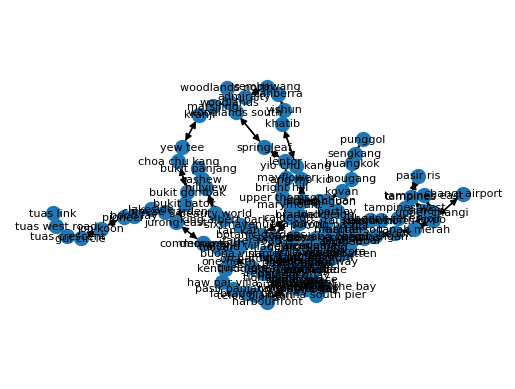

In [57]:
plot_mrt_graph(G, df_mrt_stations)

### 2.1 Implementing Closeness Centrality (4 Points)

The Closeness Centrality of a node $v$ is defined as

$$
closeness(v) = \frac{N}{\sum_{w\in V}d(v,w)}
$$

where $N$ is the number of nodes that can be reached from $v$, and $d(v,w)$ is the length of the shortest path between node $v$ and a node $w$.

We saw that both distance-based centrality measure Closeness and Betweenness require the to solve the All-Pairs Shortest Paths (APSP) problem. Since this is not a "programming" or "algorithms and data structures" module, we don't expect you to come up with your own solution for the problem from scratch. For this task, you can utilize any method from [`nx.algorithms.shortest_paths`](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html). Using a method to compute the shortest path between two nodes will make the computation of Closeness Centrality pretty straightforward.

**Implement method `closeness()` to compute the Closeness Centrality of a Graph G.** You can assume the input Graph G being strongly connected, undirected, and unweighted.

You can use the code cell below to test your implementation.

In [60]:
my_closeness_scores = closeness(G)

for station, score in sorted(my_closeness_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]:
    print('{} ({:.5f})'.format(station, score))

stevens (0.14613)
little india (0.14597)
newton (0.14597)
caldecott (0.14534)
botanic gardens (0.14255)


**Compare your implementation with the one from NetworkX**. The code cell below computes the Closeness Centrality over the *undirected* MRT graph using the implementation from NetworkX, and again shows the 5 MRT stations with the highest scores. *Important:* The NetworkX implementation uses a slightly different definition of the Closeness Centrality. The exact values (typically from the 3rd decimal position onward) will differ a bit. However, the values should be very similar and the ranking of the top-5 MRT stations should be the same.

In [58]:
nx_closeness_scores = nx.algorithms.centrality.closeness_centrality(G, wf_improved=False)

for station, score in sorted(nx_closeness_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]:
    print('{} ({:.5f})'.format(station, score))

stevens (0.14504)
little india (0.14488)
newton (0.14488)
caldecott (0.14425)
botanic gardens (0.14149)


### 2.2 Implementing PageRank Centrality (8 Points)

In this task, you will implement the basic PageRank algorithm using the Power Iteration methods as introduced in the lecture.

$$
c_{PR} = \alpha M c_{PR} + (1-\alpha)E
$$

where $E = (1/n, 1/n, ..., 1/n)^T$ with $n$ being the number of nodes.

Recall from the lecture that PageRank requires the **transition matrix** of a graph is input. For this, we provide you with the method `create_transition_matrix(A)` that converts the adjacency matrix of a Graph G into an transition matrix. Check out also the given code in method `pagerank()` where we use a numpy method to convert the Graph G to its adjacency matrix and then call `create_transition_matrix(A)`.

**Implement method `pagerank()` to compute the PageRank Centrality of a Graph G**.  You can assume the input Graph G being strongly connected, directed, and unweighted.

You can use the code cell below to test your implementation.

In [61]:
my_pagerank_scores = pagerank(G)

for station, score in sorted(my_pagerank_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]:
    print('{} ({:.5f})'.format(station, score))

outram park (0.01646)
marina bay (0.01470)
woodlands (0.01347)
tampines (0.01312)
dhoby ghaut (0.01289)


**Compare your implementation with the one from NetworkX**. The code cell below computes the PageRank Centrality over the *directed* MRT graph using the implementation from NetworkX, and again shows the 5 MRT stations with the highest scores. Apart from minor precision issues, the NetworkX result and your result should match, of course. Note that your implementation and the one of NetworkX are using the same default value for `alpha` and `eps` (called `tol` in case of NetworkX).

In [62]:
nx_pagerank_scores = nx.pagerank(G)

for station, score in sorted(nx_pagerank_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]:
    print('{} ({:.5f})'.format(station, score))

outram park (0.01646)
marina bay (0.01470)
woodlands (0.01347)
tampines (0.01312)
dhoby ghaut (0.01288)


### 2.3 Comparing Centrality Measures (8 Points)

We saw in the lecture that different centrality measures look at different topological features of a graph to quantify the importance of nodes. This task compares different measures, using the following implementations provided by `networkX`:

* [nx.algorithms.link_analysis.pagerank](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)
* [nx.centrality.in_degree_centrality](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.in_degree_centrality.html#networkx.algorithms.centrality.in_degree_centrality)
* [nx.centrality.out_degree_centrality](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.out_degree_centrality.html#networkx.algorithms.centrality.out_degree_centrality)
* [nx.centrality.closeness_centrality](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality)
* [nx.centrality.betweenness_centrality](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html)

(**Note:** [nx.algorithms.link_analysis.pagerank](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html) might give a (slightly) different ranking than your own implementation of PageRank since this implementation is a bit modified. So don't take this as a 1:1 reference to check your PageRank implementation.)

#### 2.3 a) Run Off-The-Shelf Centrality Algorithms (3 Points)

Run the 5 centrality measures on the MRT train network graph! Find the top-5 MRT stations with respect to their centrality scores and complete the table below. You only need to add the name of the MRT stations, not the scores. Keep in mind that different centrality measures assume a directed or undirected graph. While most algorithms will work on directed graphs, we consider the basic implementations covered in the lecture. In short, use `G_undirected` for Closeness and Betweenness.

Use the code cell below to show how you get to the results; use the default values for all 5 implementations of the centrality measures.


| Rank | PageRank | InDegree | OutDegree | Closeness | Betweenness |
| ---  | ---      | ---      | ---       | ---         |  --- |
| 1    | outram park | outram park | outram park | stevens | botanic gardens |
| 2    | marina bay | dhoby ghaut | dhoby ghaut | little india | caldecott |
| 3    | woodlands | marina bay | marina bay | newton | buona vista |
| 4    | tampines | stevens | stevens | caldecott | bishan |
| 5    | dhoby ghaut | serangoon | serangoon | botanic gardens | newton |

In [66]:
#########################################################################################
### Your code starts here ###############################################################
# Convert the directed graph to an undirected graph
G_undirected = G.to_undirected()

# Run centrality measures on the MRT train network graph
pagerank_scores = nx.algorithms.link_analysis.pagerank(G)
in_degree_centrality = nx.centrality.in_degree_centrality(G)
out_degree_centrality = nx.centrality.out_degree_centrality(G)
closeness_centrality = nx.centrality.closeness_centrality(G_undirected)
betweenness_centrality = nx.centrality.betweenness_centrality(G_undirected)

# Find the top-5 MRT stations for each centrality measure
top_pagerank = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:5]
top_in_degree = sorted(in_degree_centrality, key=in_degree_centrality.get, reverse=True)[:5]
top_out_degree = sorted(out_degree_centrality, key=out_degree_centrality.get, reverse=True)[:5]
top_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]

# Print the results in the table
print("Rank\tPageRank\tInDegree\tOutDegree\tCloseness\tBetweenness")
for rank in range(1, 6):
    print(f"{rank}\t{top_pagerank[rank-1]}\t{top_in_degree[rank-1]}\t{top_out_degree[rank-1]}\t{top_closeness[rank-1]}\t{top_betweenness[rank-1]}")

### Your code ends here #################################################################
#########################################################################################  

Rank	PageRank	InDegree	OutDegree	Closeness	Betweenness
1	outram park	outram park	outram park	stevens	botanic gardens
2	marina bay	dhoby ghaut	dhoby ghaut	little india	caldecott
3	woodlands	marina bay	marina bay	newton	buona vista
4	tampines	stevens	stevens	caldecott	bishan
5	dhoby ghaut	serangoon	serangoon	botanic gardens	newton


#### 2.3 b) Discussion of Results (5 Points)

Discuss the results and your observations! Based on the definitions and intuitions behind these 5 different centrality measures, discuss the results of 2.2 a): For each centrality, briefly describe what it means for a MRT station to have the highest score!

**Your answer:**

1.PageRank Centrality:PageRank is an algorithm used by search engines to rank web pages. In the context of the MRT network, a MRT station with the highest PageRank score indicates that it is a highly influential station. It suggests that this station is not only well-connected but is also connected to other important stations, making it a hub for commuters. And the top is Outram Park in this case which also reconfirm the result in 2.2a where outram park has the highest score of 0.01646.

2.In-Degree Centrality:In-degree centrality measures the number of incoming connections to a node. In the case of MRT stations, a station with the highest in-degree centrality has the most incoming train connections. This means that it is a station where many different train lines converge, making it a major transfer point. Since outram park has the highest PageRank, it is likely to have a highest InDegree. However, this alignment is not guaranteed, and there are situations where other factors, such as the quality of connections or the overall network structure, can influence the rankings differently.

3.Out-Degree Centrality:
Out-degree centrality measures the number of outgoing connections from a node. In the context of MRT stations, a station with the highest out-degree centrality has the most outgoing train connections. It suggests that this station provides access to multiple destinations, making it an important starting point for commuter Since outram park has the highest Indegree, it must has the highest outdegree, same for the rest of the stations in the InDegree rank.

4.Closeness Centrality:
Closeness centrality measures how quickly a station can reach all other stations in the network. A station with the highest closeness centrality is located in a way that it can quickly reach most other stations, indicating its strategic location and ease of access to other parts of the networ And for the stations in the top 5 are all interchanges(botanic garden(blue&yellow), stevens(blue&brown), little india(blue&purple), newton(red&blue)). They are near the center of singapore or on the circle line which is a line that you can have access to other lines quickly.k

5.Betweenness Centrality:
Betweenness centrality quantifies the extent to which a station lies on the shortest paths between other stations. A station with the highest betweenness centrality acts as a bridge or bottleneck in the network. It means that this station is crucial for connecting different parts of the network, and removing it could disrupt the network's connectivit Similar to closeness centrality, a station with high beweenness centrality, should have easy access to other lines, not to our suprise, the top four (botanic gardens, caldecott, buona vista, bishan) are all on the circle line and the last one is only two stations away from the circle line and is very near to the center of the map.y..s.

